In [95]:
import nltk
# tokenizing in various ways
from nltk.tokenize import line_tokenize, sent_tokenize, WordPunctTokenizer, word_tokenize
# stopwwords collection
from nltk.corpus import stopwords
# stemming
from nltk.stem import PorterStemmer
# to save and load models

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import pickle
# punction sentence tokenizer
from nltk.tokenize import PunktSentenceTokenizer

# regular expressions
import re
# lemmatize like stem
from nltk.stem import WordNetLemmatizer
# to ramdomly shuffle
import random
# collection of dictionary, lemma ,examples. 
from nltk.corpus import wordnet 
# To Wrap up the sklearn classifiers to be used in NLP for classifying
from nltk.classify.scikitlearn import SklearnClassifier

from sklearn.metrics import *

import numpy as np
import pandas as pd

# graphing
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

style.use("ggplot")

In [ ]:
# nltk.download()

In [74]:
pos_file = open('Data/positive.txt','r').read()
neg_file = open('Data/negetive.txt','r').read()

In [77]:
pos_without_stopwords = [word for word in pos_file.split() if word not in stopwords.words('english')]

In [79]:
# pos_without_stopwords

In [3]:
doc = []
for sentence in pos_file.splitlines():
    doc.append((sentence,'pos'))
for sentence in neg_file.splitlines():
    doc.append((sentence,'neg'))

In [4]:
random.shuffle(doc)

In [183]:
class by_count_vectorizer:

    def __init__(self,doc):
        self.doc = doc
            
    def feature_making(self):
        X_train=[]
        y_train=[]
        for sent,cat in self.doc:
            X_train.append(sent)
            y_train.append(cat)
        return X_train,y_train
    
    def convert_y_int(self,y_train,var):
        for row in range(0,len(y_train)):
            if y_train[row]==var:
                 y_train[row]= 0
            else:
                y_train[row] = 1
        return y_train
    
    def plotter(self,cross_val,classifier):
                     
        xar =[]
        yar= []
        
        x=y=0
        for rows in cross_val:
            x += 1
            print(x)
            if classifier.predict(rows)==1:
                y+=1
            else:
                y-=1
            xar.append(x)
            yar.append(y)
                    
            ax1.clear()
            ax1.plot(xar,yar,color='green')
            plt.show()
            time.sleep(100)
#             animation.FuncAnimation(fig,self.plotter,interval=1000)
            
    def classify_demo(self):
        cv = CountVectorizer()
        X_train,y_train = self.feature_making()
        y_train = self.convert_y_int(y_train,'neg')
        X = cv.fit_transform(X_train)
        x_train,x_test,y_train,y_test = train_test_split(X,y_train,test_size=0.1)
        x_train,x_cross,y_train,y_cross = train_test_split(x_train,y_train,test_size=0.2)
        mnb = MultinomialNB()
        mnb.fit(x_train,y_train)
        y_pred = mnb.predict(x_cross)
        print("Accuracy by f1 score ", f1_score(y_cross,y_pred)*100)
        if(f1_score(y_cross,y_pred)>0.8):
            feature_make_file = open('model_pickle/Count_vectorizer/count_vect.pkl','wb')
            pickle.dump(cv,feature_make_file)
            feature_make_file.close()
            model_saver = open('model_pickle/Count_vectorizer/classifier.pkl','wb')
            pickle.dump(mnb,feature_make_file)
            model_saver.close()
        feature = cv.transform(["The movie was good and I loved it"])
        if(mnb.predict(feature)==1):
            print('positive')
        else:
            print('negetive')
        fig = plt.figure()
        ax1 = self.fig.add_subplot(1,1,1)
#         self.plotter(x_cross,mnb)
        ani = animation.FuncAnimation(self.fig,self.plotter,interval=1000)

In [184]:
cv_classifier = by_count_vectorizer(doc)

Accuracy by f1 score  77.5257731958763
positive
1


NameError: name 'ax1' is not defined

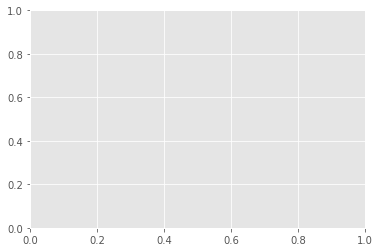

In [172]:
cv_classifier.classify_demo()

In [119]:
class by_tfid_vectorizer:

    def __init__(self,doc):
        self.doc = doc
    
    def feature_making(self):
        X_train=[]
        y_train=[]
        for sent,cat in self.doc:
            X_train.append(sent)
            y_train.append(cat)
        return X_train,y_train
    
    def convert_y_int(self,y_train,var):
        for row in range(0,len(y_train)):
            if y_train[row]==var:
                 y_train[row]= 0
            else:
                y_train[row] = 1
        return y_train
    
    def classify_demo(self):
        cv = TfidfVectorizer(min_df=1,stop_words='english')
        X_train,y_train = self.feature_making()
        y_train = self.convert_y_int(y_train,'neg')
        X = cv.fit_transform(X_train)
        x_train,x_test,y_train,y_test = train_test_split(X,y_train,test_size=0.1)
        x_train,x_cross,y_train,y_cross = train_test_split(x_train,y_train,test_size=0.2)
        mnb = MultinomialNB()
        mnb.fit(x_train,y_train)
        y_pred = mnb.predict(x_cross)
        print("Accuracy by f1 score {} and by accuracy_score is {}".format(f1_score(y_cross,y_pred)*100,accuracy_score(y_cross,y_pred)*100))
        if(f1_score(y_cross,y_pred)>0.8):
            feature_make_file = open('model_pickle/Count_vectorizer/tfid_vectorizer.pkl','wb')
            pickle.dump(cv,feature_make_file)
            feature_make_file.close()
            model_saver = open('model_pickle/Count_vectorizer/tfid_mnb_classifier.pkl','wb')
            pickle.dump(mnb,feature_make_file)
            model_saver.close()
        feature = cv.transform(["The movie was good and I loved it"])
        if(mnb.predict(feature)==1):
            print('positive')
        else:
            print('negetive')
        

In [120]:
tf_classify = by_tfid_vectorizer(doc)

In [121]:
tf_classify.classify_demo()

Accuracy by f1 score 78.92331132554595 and by accuracy_score is 78.38541666666666
positive


In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,y_train,test_size=0.1)

In [40]:
x_train,x_cross,y_train,y_cross = train_test_split(x_train,y_train,test_size=0.2)

In [33]:
mnb = MultinomialNB()

In [34]:
mnb.fit(X,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
y_pred = mnb.predict(x_cross)

In [44]:
f1_score(y_cross,y_pred)

0.9184639663335088

In [45]:
accuracy_score(y_cross,y_pred)

0.9192708333333334

In [ ]:
# # checking stopwords 
# stop_words = set(stopwords.words('english'))

In [ ]:
all_words = []
lem = WordNetLemmatizer()
for words in word_tokenize(pos_file):
    if words not in set(stopwords.words('english')):
        all_words.append(lem.lemmatize(words.lower()))
for words in word_tokenize(neg_file):
    if words not in set(stopwords.words('english')):
        all_words.append(lem.lemmatize(words.lower()))

In [ ]:
# all_words

In [ ]:
tagged = []
for sent in pos_file.splitlines():
    words = nltk.word_tokenize(sent)
    tagged.append(nltk.pos_tag(words))

In [ ]:
for sent in neg_file.splitlines():
    words = nltk.word_tokenize(sent)
    tagged.append(nltk.pos_tag(words))

In [ ]:
# tagged

In [ ]:
# custom_sent_tokenizer = PunktSentenceTokenizer(pos_file)
# token = custom_sent_tokenizer.tokenize(pos_file)

In [ ]:
# trying to take out noun, prepositions etc
# chunked= []
# for tok in token:
#     words = nltk.word_tokenize(tok)
#     tagged = nltk.pos_tag(words)
#     chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
#     chunkParser = nltk.RegexpParser(chunkGram)
#     chunked.append(chunkParser.parse(tagged))

In [ ]:
# custom_sent_tokenizer = PunktSentenceTokenizer(neg_file)
# token = custom_sent_tokenizer.tokenize(neg_file)

In [ ]:
# for tok in token:
#     words = nltk.word_tokenize(tok)
#     tagged = nltk.pos_tag(words)
#     chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
#     chunkParser = nltk.RegexpParser(chunkGram)
#     chunked.append(chunkParser.parse(tagged))

In [ ]:
words_freq = nltk.FreqDist(all_words)

In [ ]:
words_freq['good']

In [ ]:
top_words = list(words_freq.keys())[:6000]

In [ ]:
('romance' in top_words)

In [ ]:
class feature_maker:
    def __init__(self,top_words):
        self.top_words = top_words
        
    def find_feature(self,doc):
        features = {}
        words = set(doc)
        for w in self.top_words:
            features[w] = (w in words)
        return features

In [ ]:
fm = feature_maker(top_words)

In [ ]:
features = [ (fm.find_feature(sent),category) for (sent,category) in doc]

In [ ]:
feature_make_file = open('model_pickle/feature_maker.pkl','wb')
pickle.dump(fm,feature_make_file)
feature_make_file.close()

In [ ]:
# features[0]

In [ ]:
random.shuffle(features)

In [ ]:
set1 = int(len(features)*0.9)

In [ ]:
train_set = features[:set1]
test_set = features[set1:set1+5]
cross_val = features[set1+5:]

In [ ]:
test_file = open('Data/test_set.pkl','wb')
pickle.dump(test_set,test_file)
test_file.close()

In [ ]:
classifier = nltk.classify.NaiveBayesClassifier.train(cross_val)
print("The accuracy for Naive bayes calssifier is",nltk.classify.accuracy(classifier,cross_val)*100)

In [ ]:
model_file = open('model_pickle/classifier.pkl','wb')
pickle.dump(classifier,model_file)
test_file.close()

In [ ]:
feature = fm.find_feature("The movie was bad no action and made no sence, it was not good")

In [72]:
classifier.classify(feature)

NameError: name 'classifier' is not defined